In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))
print("NMI: {:.2f}".format(normalized_mutual_info_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
NMI: 1.00


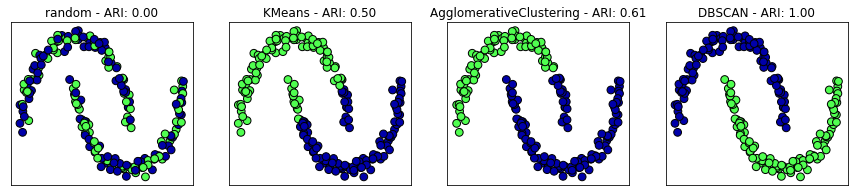

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from matplotlib.colors import ListedColormap

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듬
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=cm3, s=60, edgecolors='black')
axes[0].set_title("random - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심 표현
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))
plt.show()    


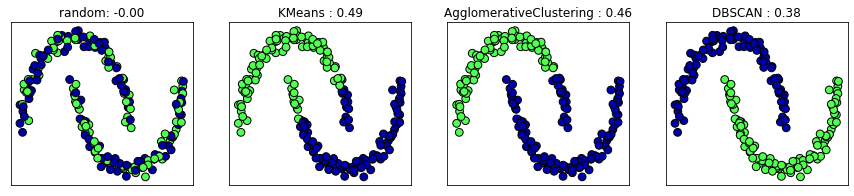

In [2]:
# 실루엣지수
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당을 합니다
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=cm3, s=60, edgecolors='black')
axes[0].set_title("random: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=cm3,
               s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()    